In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 427M/427M [00:03<00:00, 151MB/s]
100% 427M/427M [00:03<00:00, 138MB/s]


In [3]:
pwd

'/content'

In [4]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

DELETE THE UNNECESSARY FILEAS AND FOLDERS CREATED


In [5]:
import shutil


directory_path = '/content/dataset'

shutil.rmtree(directory_path)

print(f'The directory "{directory_path}" has been deleted.')

The directory "/content/dataset" has been deleted.


CHECK THE NUMBER OF FILES PRESENT


In [6]:
import os

def check_files():

  directory_path = '/content/DATASET'
  sub_dir= ['TEST/O','TEST/R','TRAIN/O','TRAIN/R','VALIDATION/O','VALIDATION/R']

  for dir in sub_dir:
    path = os.path.join(directory_path,dir)
    if os.path.exists(path):
      num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
      print(f'The number of files in "{path}" is: {num_files}')

check_files()

The number of files in "/content/DATASET/TEST/O" is: 1401
The number of files in "/content/DATASET/TEST/R" is: 1112
The number of files in "/content/DATASET/TRAIN/O" is: 12565
The number of files in "/content/DATASET/TRAIN/R" is: 9999


CREATING VALIDATING DATASET

In [8]:
import random

def move_images(source_dir, target_dir, num_images):

    if not os.path.exists(target_dir):
        os.makedirs(target_dir)


    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]


    selected_files = random.sample(files, num_images)


    for file in selected_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(target_dir, file))


source_dir_O = '/content/DATASET/TRAIN/O'
source_dir_R = '/content/DATASET/TRAIN/R'
target_dir_O = '/content/DATASET/VALIDATION/O'
target_dir_R = '/content/DATASET/VALIDATION/R'


num_images_to_move = 1500


move_images(source_dir_O, target_dir_O, num_images_to_move)

print(f'Moved {num_images_to_move} images from "{source_dir_O}" to "{target_dir_O}".')
print(f'Moved {num_images_to_move} images from "{source_dir_R}" to "{target_dir_R}".')


Moved 1500 images from "/content/DATASET/TRAIN/O" to "/content/DATASET/VALIDATION/O".
Moved 1500 images from "/content/DATASET/TRAIN/R" to "/content/DATASET/VALIDATION/R".


PLOTTING THE GRAPH

In [9]:
import matplotlib.pyplot as plt

def plot_graph(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))


    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')


    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

DATASET

In [10]:


train_dir = '/content/DATASET/TRAIN'
validation_dir = '/content/DATASET/VALIDATION'
test_dir = '/content/DATASET/TEST'


batch_size = 32
img_height = 224
img_width = 224


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)



test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(class_names)


Found 18064 files belonging to 2 classes.
Found 4500 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.
['O', 'R']


CHECKING THE DATA

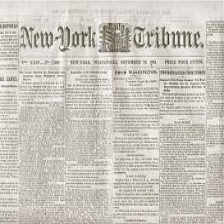

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



for images, labels in train_ds.take(1):
    first_image = images[3].numpy().astype("uint8")
    first_label = labels[3].numpy()


first_image_bgr = cv2.cvtColor(first_image, cv2.COLOR_RGB2BGR)


cv2_imshow( first_image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
first_label

1

In [13]:
normalization_layer = layers.Rescaling(1./255)

normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))



MODEL BUILDING


ANN

In [14]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [15]:
ann_model = Sequential([
    Flatten(input_shape=(img_width, img_height, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


ann_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      77,070,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,235,201 (294.63 MB)

 Trainable params: 77,235,201 (294.63 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
ann_history = ann_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=10)

Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.5758 - loss: 2.1809 - val_accuracy: 0.8173 - val_loss: 0.4631
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.5954 - loss: 0.6381 - val_accuracy: 0.6762 - val_loss: 0.6451
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.5895 - loss: 0.6553 - val_accuracy: 0.8153 - val_loss: 0.6305
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.6026 - loss: 0.6446 - val_accuracy: 0.7880 - val_loss: 0.5181
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.6390 - loss: 0.6059 - val_accuracy: 0.8222 - val_loss: 0.5118
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.6458 - loss: 0.5866 - val_accuracy: 0.8100 - val_loss: 0.4583
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.6399 - loss: 0.5975 - val_accuracy: 0.8222 - val_loss: 0.4761
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.6418 - loss: 0.5969 - 

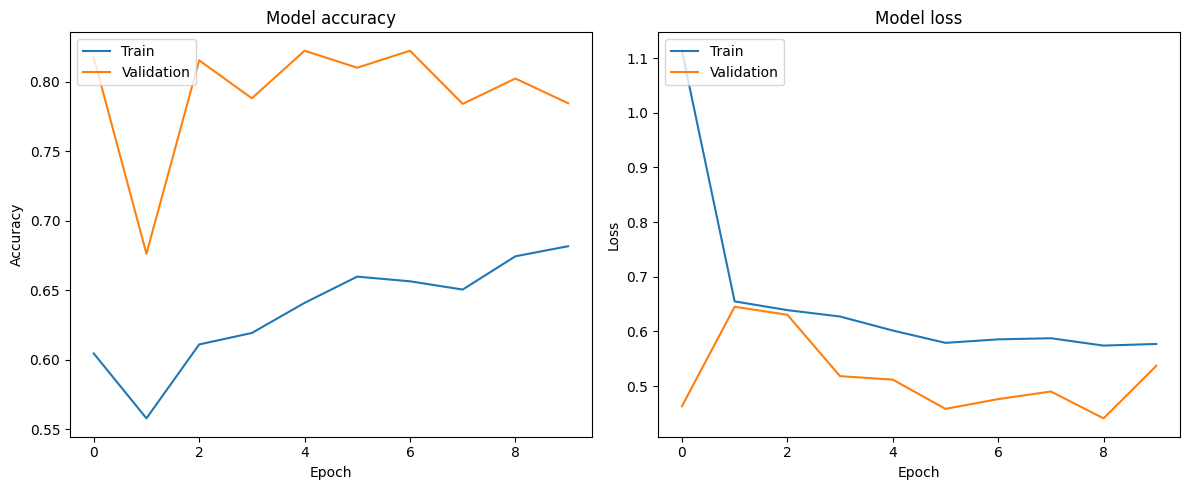

In [17]:
plot_graph(ann_history)

CNN

In [18]:
from tensorflow.keras.layers import Conv2D , BatchNormalization, MaxPooling2D

In [19]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,399,553 (169.37 MB)

 Trainable params: 44,398,081 (169.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [20]:
cnn_history = cnn_model.fit(normalized_train_ds,validation_data = normalized_val_ds,epochs=10)


Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 66s 94ms/step - accuracy: 0.7690 - loss: 0.5899 - val_accuracy: 0.6231 - val_loss: 0.6790
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 59s 71ms/step - accuracy: 0.8353 - loss: 0.3895 - val_accuracy: 0.5831 - val_loss: 0.9533
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8581 - loss: 0.3453 - val_accuracy: 0.8682 - val_loss: 0.3191
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 79s 68ms/step - accuracy: 0.8727 - loss: 0.3197 - val_accuracy: 0.8442 - val_loss: 0.3536
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.8830 - loss: 0.2849 - val_accuracy: 0.8524 - val_loss: 0.3622
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.8918 - loss: 0.2685 - val_accuracy: 0.8858 - val_loss: 0.2931
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.8906 - loss: 0.2678 - val_accuracy: 0.8778 - val_loss: 0.3268
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9103 - loss: 0.2207 - 

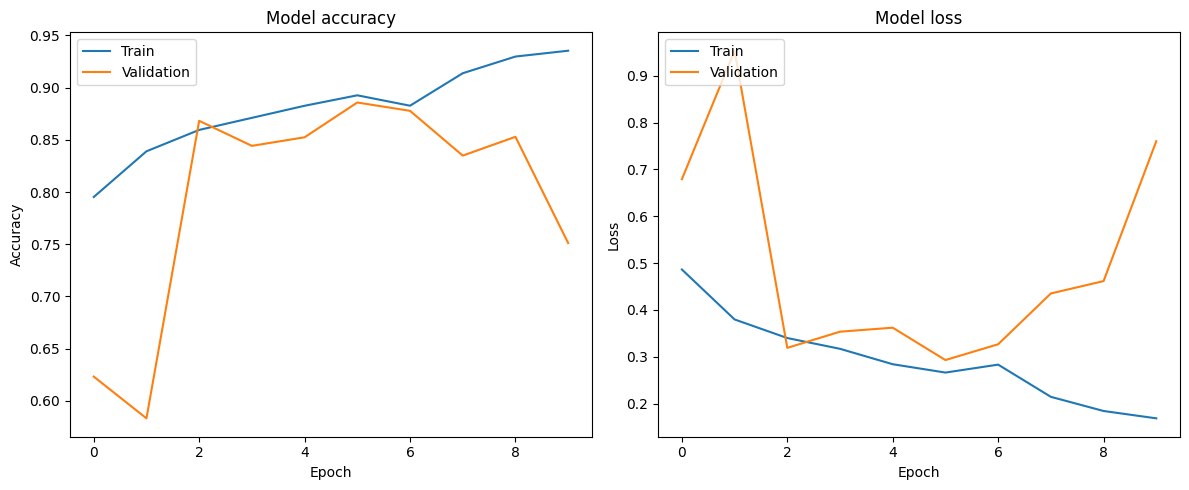

In [21]:
plot_graph(cnn_history)

VGG 16


In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


In [23]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable=False
for layer in base_model.layers[-4:]:
    layer.trainable = True

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
vgg_model = Model(inputs=base_model.input, outputs=predictions)
vgg_model.compile(optimizer=Adam(learning_rate=1e-6), loss='binary_crossentropy', metrics=['accuracy'])
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,406,849 (154.14 MB)

 Trainable params: 32,771,585 (125.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [24]:
vgg_history = vgg_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=10)

Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 171s 268ms/step - accuracy: 0.7655 - loss: 0.4986 - val_accuracy: 0.8798 - val_loss: 0.3063
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 153s 211ms/step - accuracy: 0.8793 - loss: 0.2996 - val_accuracy: 0.8976 - val_loss: 0.2604
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 141s 210ms/step - accuracy: 0.9079 - loss: 0.2408 - val_accuracy: 0.9036 - val_loss: 0.2453
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 117s 208ms/step - accuracy: 0.9220 - loss: 0.2083 - val_accuracy: 0.9122 - val_loss: 0.2224
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 143s 210ms/step - accuracy: 0.9325 - loss: 0.1823 - val_accuracy: 0.9182 - val_loss: 0.2058
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 143s 211ms/step - accuracy: 0.9383 - loss: 0.1641 - val_accuracy: 0.9218 - val_loss: 0.2008
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 118s 208ms/step - accuracy: 0.9470 - loss: 0.1472 - val_accuracy: 0.9193 - val_loss: 0.2040
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 143s 210ms/step - accuracy: 0.9544 -

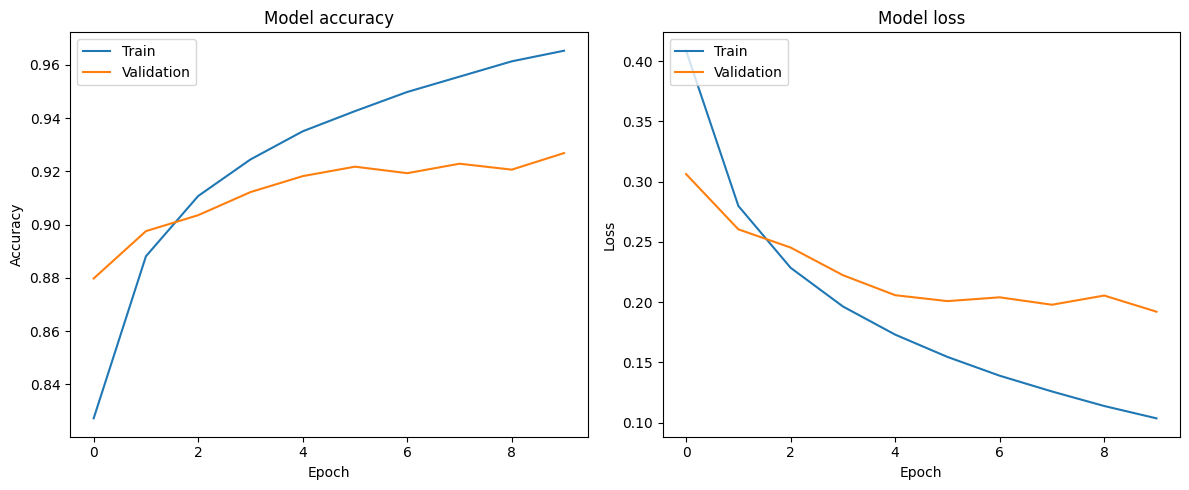

In [25]:
plot_graph(vgg_history)

RESNET

In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Dropout


In [30]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
# ... your other imports ...


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width,img_width, 3))

base_model.trainable = False

for layer in base_model.layers[-10:]:
    layer.trainable = True

resnet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])


resnet_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# The fix: Pass a dummy input to the model to define the shapes
dummy_input = np.zeros((1, img_width, img_width, 3)) # Assuming img_width is defined
resnet_model(dummy_input) # Build the model by calling it with a dummy input

resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (1, 7, 7, 2048)             │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (1, 2048)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (1, 256)                    │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (1, 256)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (1, 1)                      │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 4,990,465 (19.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [31]:
resnet_history = resnet_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=10)

Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 94s 137ms/step - accuracy: 0.6941 - loss: 0.5958 - val_accuracy: 0.5342 - val_loss: 0.7041
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 64s 112ms/step - accuracy: 0.7835 - loss: 0.4754 - val_accuracy: 0.5193 - val_loss: 0.7932
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.7980 - loss: 0.4482 - val_accuracy: 0.8287 - val_loss: 0.4046
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - accuracy: 0.8087 - loss: 0.4280 - val_accuracy: 0.8113 - val_loss: 0.4350
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 62s 110ms/step - accuracy: 0.8129 - loss: 0.4212 - val_accuracy: 0.8100 - val_loss: 0.4268
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 72s 128ms/step - accuracy: 0.8207 - loss: 0.4082 - val_accuracy: 0.8060 - val_loss: 0.4654
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - accuracy: 0.8274 - loss: 0.3953 - val_accuracy: 0.5187 - val_loss: 0.8384
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 63s 111ms/step - accuracy: 0.8304 - loss: 0

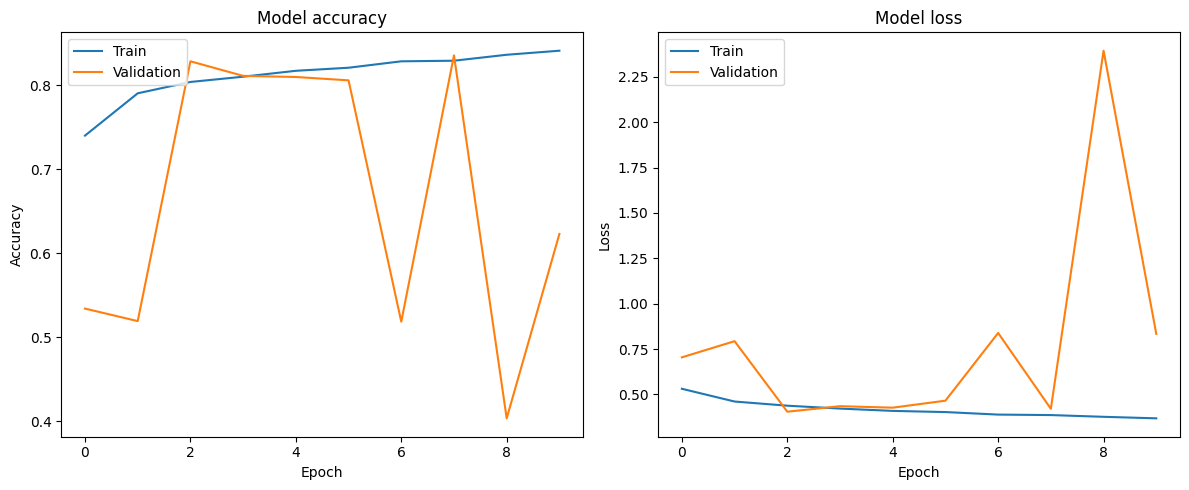

In [32]:
plot_graph(resnet_history)

MOBILE NET V2

In [33]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import RMSprop


In [35]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

mobilenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])


mobilenet_model.compile(optimizer=RMSprop(learning_rate=2e-5), # Changed 'lr' to 'learning_rate'
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [36]:
mobilenet_history = mobilenet_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=8)

Epoch 1/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.8363 - loss: 0.3624 - val_accuracy: 0.9296 - val_loss: 0.1889
Epoch 2/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.9409 - loss: 0.1546 - val_accuracy: 0.9502 - val_loss: 0.1415
Epoch 3/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.9555 - loss: 0.1197 - val_accuracy: 0.9516 - val_loss: 0.1418
Epoch 4/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.9656 - loss: 0.0883 - val_accuracy: 0.9493 - val_loss: 0.1553
Epoch 5/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.9728 - loss: 0.0738 - val_accuracy: 0.9491 - val_loss: 0.1555
Epoch 6/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.9815 - loss: 0.0545 - val_accuracy: 0.9536 - val_loss: 0.1400
Epoch 7/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9881 - loss: 0.0342 - val_accuracy: 0.9529 - val_loss: 0.1552
Epoch 8/8
565/565 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9903 - loss: 0.0261 - val_accu

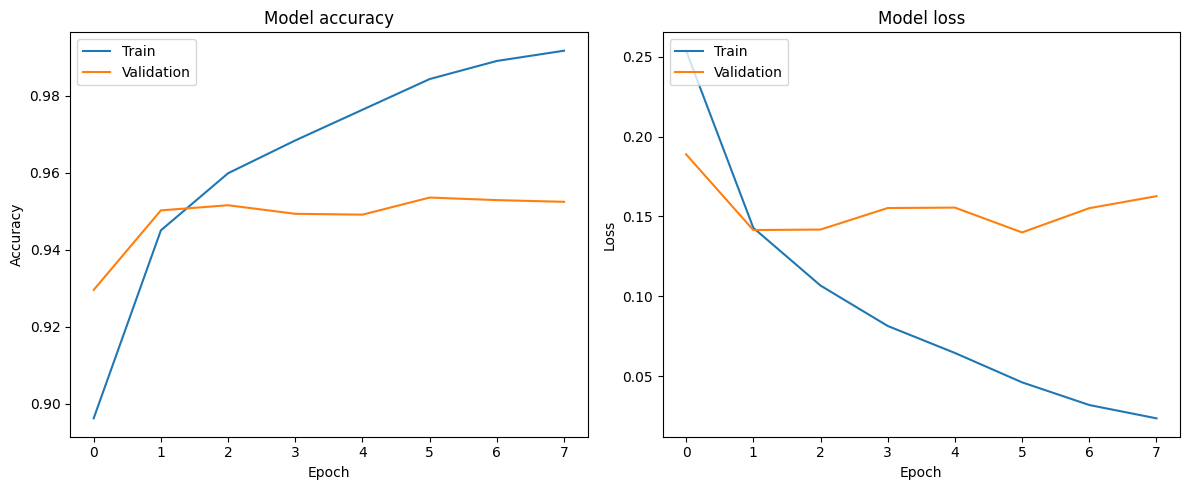

In [37]:
plot_graph(mobilenet_history)


MODEL TESTING AND EVALUATION

In [38]:
ann_loss, ann_accuracy = ann_model.evaluate(normalized_test_ds)
print("ANN Accuracy: {:.2f}%".format(ann_accuracy * 100))


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8408 - loss: 0.5563
ANN Accuracy: 85.91%


In [39]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(normalized_test_ds)
print("CNN Accuracy: {:.2f}%".format(cnn_accuracy * 100))

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7985 - loss: 0.5698
CNN Accuracy: 81.46%


In [40]:
vgg_loss, vgg_accuracy = vgg_model.evaluate(normalized_test_ds)
print("VGG Accuracy: {:.2f}%".format(vgg_accuracy * 100))

79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 288ms/step - accuracy: 0.9126 - loss: 0.2830
VGG Accuracy: 90.77%


In [41]:
resnet_loss, resnet_accuracy = resnet_model.evaluate(normalized_test_ds)
print("ResNet Accuracy: {:.2f}%".format(resnet_accuracy * 100))


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.6918 - loss: 0.6897
ResNet Accuracy: 69.32%


In [42]:
mobilenet_loss, mobilenet_accuracy = mobilenet_model.evaluate(normalized_test_ds)
print("MobileNet Accuracy: {:.2f}%".format(mobilenet_accuracy * 100))


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.8567 - loss: 0.4772
MobileNet Accuracy: 85.24%
